# Tutorial 28: Dictionaries and Sets

## PHYS 2600, Spring 2019

## T28.1 - Basic use of dictionaries

Let's start by getting some practice using dictionaries and seeing some of their commonly-used methods.

### Part A

__Create a dictionary called `vowel_index`__ that maps the vowels `['a','e','i','o','u']` to their index numbers in the English alphabet (so if we take `a` to correspond to `0`, then we have

| letter | index |
|--------|-------|
| a | 0 |
| e | 4 |
| i | 8 | 
| o | 14 |
| u | 20 |





In [1]:
vowel_index = {
    'a': 0,
    'e': 4,
    'i': 8,
    'o': 14,
    'u': 20,
}

The `ord()` function gives the ASCII index of a character, in which the letters are numbered starting at 97 instead of 0.  __What is the ASCII index of `'u'`?__  Find your answer by getting the relative index of `'u'` from `vowel_index`, first, then compare to `ord()` itself.

In [2]:
print(vowel_index['u'] + 97)
print(ord('u'))

117
117


The letter `'y'` (index: 24) _sometimes_ acts like a vowel, so let's add it to our dictionary.  __Add `'y'` as a key with value 24 to `vowel_index`__.  Then print out `vowel_index` to see that your code worked.

In [3]:
vowel_index['y'] = 24
vowel_index

{'a': 0, 'e': 4, 'i': 8, 'o': 14, 'u': 20, 'y': 24}

### Part B

Any dictionary naturally divides into two sets: the __keys__ (what the index names are), and the __values__ (what objects the index names point to.)  We can access these sets directly with the methods of the same name - __run the cell below__ to see them work.

In [4]:
print(vowel_index.keys())
print(vowel_index.values())

dict_keys(['a', 'e', 'i', 'o', 'u', 'y'])
dict_values([0, 4, 8, 14, 20, 24])


Note that although these return special dict-associated types, we can treat both keys and values like lists.  In particular, we can _iterate_ over them using a `for` loop.  Then:

* Use a `for` loop and string concatenation (the `+` operator) to __build a string of all the vowels (and y)__ from the keys of `vowel_index`.
* Use another `for` loop to __calculate the sum of all of the _values_ of `vowel_index`__, i.e. the sum of all vowel letter indices.  (You should get 70.)

In [5]:
s = ''
for v in vowel_index.keys():
    s += v
    
print(s)

total = 0
for i in vowel_index.values():
    total += i

print(total)

aeiouy
70


__Important Python 3 note:__ In alphabetical order, the string of all the vowels you made above would be `"aeiouy"`.  But remember that _order of the keys/values in a dict is not guaranteed!_  In Python 3, the current implementation of dictionary _happens_ to give keys back in the order they were added to the dict.  If you try to run this in Python 2 instead, you would get a different string as the keys will be in a different order.

__Never rely on the order of keys or values in a dictionary!__  Use a list-sorting function (like `sorted()`) if you need them in a certain order.

In [6]:
%%python2

vowel_index = {
    'a': 0,
    'e': 4,
    'i': 8,
    'o': 14,
    'u': 20,
}

for v in vowel_index.keys():
    print v
    
for v in sorted(vowel_index.keys()):
    print "Sorted: ", v

a
i
e
u
o
Sorted:  a
Sorted:  e
Sorted:  i
Sorted:  o
Sorted:  u


### Part C

There's a third list which is natural to construct from a dictionary: a list of __key-value pairs__.  To get them, we use the `.items()` method.

Start by __running the cell below__ to see what you get when iterating over `vowel_index.items()`.  Then modify the code to unpack the keys and values separately, and __use `print` to reproduce the block of text__ in the next cell below.

_(Hint: you can either unpack `pair` inside the loop, or use the unpacking notation inside the `for` statement itself: replace the single variable `pair` with a tuple of two variables.)_

In [7]:
for pair in vowel_index.items():
    print(pair)
    
### BEGIN SOLUTION
for k, v in vowel_index.items():
    print("ASCII code for {}: {}".format(k, v+97))
### END SOLUTION


('a', 0)
('e', 4)
('i', 8)
('o', 14)
('u', 20)
('y', 24)
ASCII code for a: 97
ASCII code for e: 101
ASCII code for i: 105
ASCII code for o: 111
ASCII code for u: 117
ASCII code for y: 121


Modify the cell above to print the text below:

```
ASCII code for a: 97
ASCII code for e: 101
ASCII code for i: 105
ASCII code for o: 111
ASCII code for u: 117
ASCII code for y: 121
```

### Part D

In many situations, we might be unsure about whether a key exists in a dictionary.  We can test for its existence using the `in` operator: `x in L` is a Boolean expression which is `True` if `x` is in list `L`, and `False` otherwise.

The code below makes a new dictionary of Unicode letters, `char_codes`.  Use `in` to answer the following questions:

* Is `ë` in the keys of `char_codes`?
* Is `©` in the values of `char_codes`?
* Is `ȼ` in the keys or values of `char_codes`?


_(Hint: copy and paste these Unicode characters, don't try to figure out how to type them!  You could also look through the dictionary by eye...but it's pretty long!)_

In [8]:
char_codes = {}
for i in range(512):
    char_codes[chr(i)] = chr(i+57)

### BEGIN SOLUTION
print('ë' in char_codes.keys())
print('©' in char_codes.values())
print('ȼ' in char_codes.keys())
print('ȼ' in char_codes.values())
### END SOLUTION


True
True
False
False


Note in passing: the `in` operator automatically checks the keys if we give it a dictionary, so we can just write `c in char_codes` instead of `c in char_codes.keys()`.  (But I had to look up whether this checks the values too - it doesn't - so maybe it's better to avoid ambiguity and just use `.keys()` explicitly!)

Back to our simpler dict of vowels.  _What happens if we try to get a key that doesn't exist?_  Ordinarily, this will simply give us an error message, like trying to access a list index that doesn't exist.  __Run the cell below__ to see the message.

In [9]:
vowel_index['z']

KeyError: 'z'

If we want to use a key that may or may not exist, we can either test with `in` first, but a more streamlined option is to use the `.get()` method to safely ask for that entry.  __Run the cell below__ to see a few variations on the use of `.get()`:

In [10]:
print(vowel_index.get('z'))
print(vowel_index.get('e'))
print(vowel_index.get('z', 'default'))

None
4
default


Note that by default, `.get()` returns `None` if we try to get a key that doesn't exist.  We can override the default with the second argument to `.get()`.

Below is a list of some letters.  Use a `for` loop to iterate over the list, and use `.get()` with a default argument to __reproduce the text block in the next cell below.__

In [11]:
some_letters = ['a', 'd', 'i', 'j', 'k', 'u']

### BEGIN SOLUTION
for L in some_letters:
    print('{}: {}'.format(L, vowel_index.get(L, 'not a vowel')))
### END SOLUTION

a: 0
d: not a vowel
i: 8
j: not a vowel
k: not a vowel
u: 20


Modify the cell above to print the text below:

```
a: 0
d: not a vowel
i: 8
j: not a vowel
k: not a vowel
u: 20
```

## T28.2 - Common use patterns of dictionaries

### Part A: Translation

As we discussed, one way to think of a dictionary is as a __map__ from keys to values.  Maps naturally appear in __translations__, such as between different languages; translations match equivalent things to one another.  Here's a table of a few different words in English and French:

| English | French | 
|---------|--------|
| car | voiture |
| book | livre |
| coffee | café |
| dog | chien |
| thanks  | merci |

In the cell below, __make a dictionary called `english_to_french`__ with the English words as keys and the French words as values.  You should __build the dictionary with a `for` loop__ using the lists provided.

In [12]:
english_words = ['car', 'book', 'coffee', 'dog', 'thanks']
french_words = ['voiture', 'livre', 'café', 'chien', 'merci']

### BEGIN SOLUTION
english_to_french = {}
for i in range(5):
    english_to_french[english_words[i]] = french_words[i]
### END SOLUTION


In [13]:
print(english_to_french)
assert english_to_french['car'] == 'voiture'
assert english_to_french['thanks'] == 'merci' 

{'car': 'voiture', 'book': 'livre', 'coffee': 'café', 'dog': 'chien', 'thanks': 'merci'}


Dictionaries are _one-way_ maps, but a translation is _two-way_: we could also use our map to convert French words back to English, since the pairs are unique.  Fortunately, it's not too difficult to just __invert the dictionary__, i.e. make one that points from values to keys instead.   

__Implement the function `invert_dict(d)` below__, which should return a new dictionary where the _values_ of `d` point to its _keys_.  Then run the following cell to create and test the reverse dictionary `french_to_english`.

_(Hint: start by making a new empty dictionary.  Then use a `for` loop and the `.items()` method to iterate over all key-value pairs `(k,v)` in the original dictionary, and assign them to the empty one with values as keys.)_

In [14]:
def invert_dict(d):
    ### BEGIN SOLUTION
    inv_d = {}
    for k, v in d.items():
        inv_d[v] = k
        
    return inv_d
    ### END SOLUTION    

In [15]:
french_to_english = invert_dict(english_to_french)
print(french_to_english)

assert french_to_english['livre'] == 'book'
assert french_to_english['café'] == 'coffee'

{'voiture': 'car', 'livre': 'book', 'café': 'coffee', 'chien': 'dog', 'merci': 'thanks'}


(Note: this only makes sense if the map is truly two-way, i.e. all keys and values are matched uniquely __one-to-one__!  If we try to "invert" a dictionary with multiple keys pointing to the same value, we'll lose some information.)

### Part B: Descriptive Data

The second common use case for dictionaries is storing __descriptive data__.  This comes in many forms, so it's probably best to just see an example.  On homework 7, we had an example using tuples to keep track of some blocks subject to static friction.  Here was the data cell:

In [16]:
block_list = (
    (0.5, 0.8, 0.2),
    (1.0, 3.0, 0.2),
    (2.0, 4.4, 0.2),
    (3.0, 5.6, 0.1),
    (2.0, 2.2, 0.3),
    (2.0, 1.6, 0.1),
    (1.0, 2.6, 0.1),
)
block_color_list = ('red', 'orange', 'yellow', 'green', 'blue', 'white', 'black')

Do you remember what those numbers were in `block_list`?  I know I had to look it up!  In order, they are: `(m, F, mu)`, the mass, applied force, and coefficient of static friction.  Better documentation (i.e. a comment explaining) would have cleared this up, but we can make our code much clearer by using a dictionary to hold our data instead!



In the _second cell_ below, I've created a function `check_if_block_moves` that checks if the force of static friction is overcome given the applied force or not.  This function assumes that `blocks` contains a __list of dictionaries__, with each dictionary having keys `m`, `mu`, `F` and `color` to describe a single block.

In the _first_ cell below, __create a list of dictionaries called `blocks`__ so that the cell with `check_if_block_moves()` will run without error (and give the right answer!)  You can either do this by hand, or use a `for` loop to build the `blocks` list of dictionaries using the data from above.

In [17]:
blocks = [
    { 'm': 0.5, 'F': 0.8, 'mu': 0.2, 'color': 'red'},
    { 'm': 1.0, 'F': 3.0, 'mu': 0.2, 'color': 'orange'},
    { 'm': 2.0, 'F': 4.4, 'mu': 0.2, 'color': 'yellow'},
    { 'm': 3.0, 'F': 5.6, 'mu': 0.1, 'color': 'green'},
    { 'm': 2.0, 'F': 2.2, 'mu': 0.3, 'color': 'blue'},
    { 'm': 2.0, 'F': 1.6, 'mu': 0.1, 'color': 'white'},
    { 'm': 1.0, 'F': 2.6, 'mu': 0.1, 'color': 'black'},
]

# Or the automated version from the lists above:
blocks = []
for i in range(7):
    b = {}
    b['m'], b['F'], b['mu'] = block_list[i]
    b['color'] = block_color_list[i]
    blocks.append(b)

In [18]:
def check_if_block_moves(block):
    g = 9.8
    F_friction = block['mu'] * block['m'] * g
    
    if block['F'] <= F_friction:
        print("The {} block doesn't move.".format(block['color']))
    else:
        print("The {} block moves!".format(block['color']))

for block in blocks:
    check_if_block_moves(block)

The red block doesn't move.
The orange block moves!
The yellow block moves!
The green block moves!
The blue block doesn't move.
The white block doesn't move.
The black block moves!


You should see the following text:

```
The red block doesn't move.
The orange block moves!
The yellow block moves!
The green block moves!
The blue block doesn't move.
The white block doesn't move.
The black block moves!
```

### Part C: Counting

Another common use case for dictionaries is __counting unique values__, for example in creating a histogram of frequencies (how many times something appears in a collection.)

I've provided a data file called `classes.csv`, containing a list of class schedules for some sophomore CU physics students.  For simplicity, each row has four classes in it.  I've also provided some code below to import the data as a NumPy array.

Use a dictionary to answer the question: __how many students in our data are enrolled in each class?__  Save your answer in a dictionary called `class_count`, with the class names as keys and the number of students enrolled as values.

In [19]:
import numpy as np

class_array = np.genfromtxt('classes.csv',  delimiter=',', dtype=np.unicode)
print(class_array)

### BEGIN SOLUTION
class_count = {}
for row in class_array:
    for s in row:
        if s in class_count.keys():
            class_count[s] += 1
        else:
            class_count[s] = 1

class_count
### END SOLUTION

[['PHYS 2150' 'CHEM 1113' 'PHYS 2170' 'APPM 2350']
 ['PHYS 2600' 'APPM 2350' 'PHYS 2150' 'PHYS 2170']
 ['PHYS 2170' 'CHEM 1113' 'PHYS 2150' 'APPM 2350']
 ['PHYS 2150' 'PHYS 2170' 'CHEM 1113' 'WRTG 3030']
 ['PHYS 2600' 'PHYS 2170' 'PHYS 2150' 'WRTG 3030']
 ['CHEM 1113' 'PHYS 2150' 'PHYS 2170' 'WRTG 3030']
 ['PHYS 2150' 'PHYS 2170' 'CHEM 1113' 'APPM 2350']
 ['PHYS 2170' 'APPM 2350' 'PHYS 2150' 'CHEM 1113']
 ['APPM 2350' 'PHYS 2150' 'PHYS 2600' 'WRTG 3030']
 ['APPM 2350' 'PHYS 2170' 'PHYS 2600' 'PHYS 2150']
 ['PHYS 2170' 'APPM 2350' 'PHYS 2150' 'CHEM 1113']
 ['PHYS 2150' 'HUEN 3100' 'PHYS 2170' 'WRTG 3030']
 ['PHYS 2170' 'PHYS 2150' 'APPM 2350' 'WRTG 3030']
 ['APPM 2350' 'CHEM 1113' 'PHYS 2170' 'PHYS 2600']
 ['PHYS 2150' 'PHYS 2600' 'WRTG 3030' 'APPM 2350']
 ['APPM 2350' 'PHYS 2170' 'PHYS 2150' 'PHYS 2600']
 ['PHYS 2600' 'PHYS 2150' 'PHYS 2170' 'APPM 2350']
 ['APPM 2350' 'WRTG 3030' 'PHYS 2150' 'PHYS 2600']
 ['PHYS 2150' 'APPM 2350' 'PHYS 2170' 'HUEN 3100']
 ['APPM 2350' 'CHEM 1113' 'PHYS

{'PHYS 2150': 27,
 'CHEM 1113': 14,
 'PHYS 2170': 25,
 'APPM 2350': 24,
 'PHYS 2600': 14,
 'WRTG 3030': 12,
 'HUEN 3100': 4}

Once you've produced the unique count dict `class_count`, __run the cell below__ to make a histogram of the frequencies.  Note that there are a few little plotting tricks here that might be useful to know:

* For data that don't need to be binned, use `plt.bar()` instead of `plt.hist()`.
* To fix overlapping tick labels, use the `rotation=` keyword: here I rotated them to be vertical instead of horizontal.
* Immediately after adding the vertical tick labels, they will be cut off the bottom of the plot.  The command `plt.tight_layout()` is a function which automatically attempts to rescale elements of your plot so that nothing gets cut off.

<IPython.core.display.Javascript object>


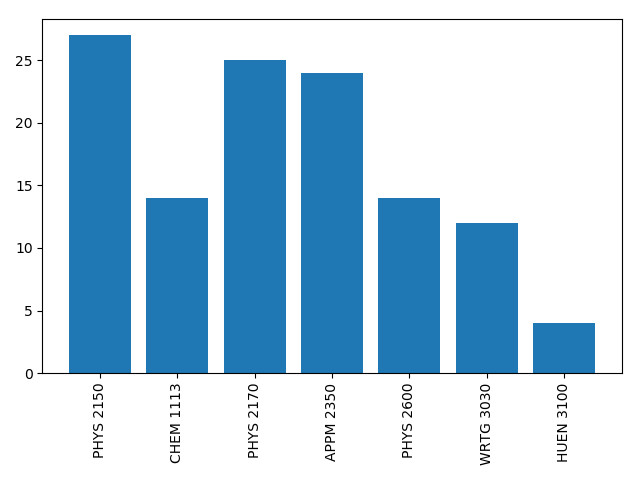

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt

Nc = len(class_count)
plt.bar(np.arange(Nc), list(class_count.values()))#
plt.xticks(np.arange(Nc), class_count.keys(), rotation='vertical')
plt.tight_layout()